In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.set_index(['PassengerId'], inplace=True)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(titanic, titanic['Survived'], test_size=0.25,random_state=1000)


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([246. , 263.6, 281.2, 298.8, 316.4, 334. , 351.6, 369.2, 386.8,
        404.4, 422. ]),
 <BarContainer object of 10 artists>)

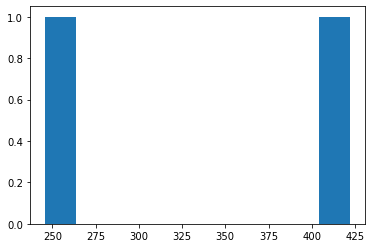

In [5]:
survived = sum(y_train == 1)
not_survived = sum(y_train == 0)
plt.hist([survived,not_survived])

In [6]:
x_train = X_train.drop(["Survived"], axis=1)

In [7]:
x_test= X_test.drop(['Survived'],axis=1)

In [8]:
x_test.shape

(223, 10)

In [9]:
x_train.shape

(668, 10)

In [10]:
y_train.shape

(668,)

In [11]:
sur = [[sum(y_train == 1)],[sum(y_train == 0)]]
survival = pd.DataFrame(data = sur, index = ["survived", "not_survived"])
survival

,0
survived,246
not_survived,422


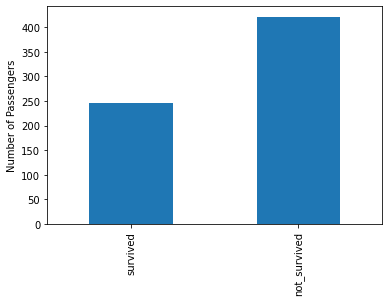

In [12]:
survival.plot.bar(legend=False)
plt.ylabel("Number of Passengers");

<AxesSubplot:xlabel='Survived', ylabel='count'>

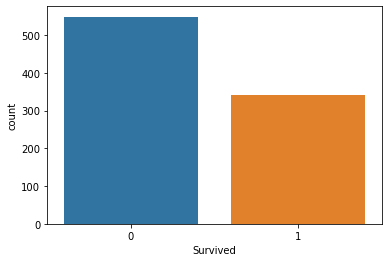

In [14]:
import seaborn as sns
sns.countplot(x="Survived", data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

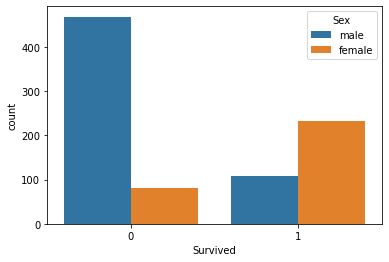

In [16]:
import seaborn as sns
sns.countplot(x="Survived",
              hue="Sex",
              data=titanic)

In [18]:
titanic.groupby(["Pclass", "Survived"]).count()

Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Pclass Survived                                                             
1      0           80   80   64     80     80      80    80     59        80
       1          136  136  122    136    136     136   136    117       134
2      0           97   97   90     97     97      97    97      3        97
       1           87   87   83     87     87      87    87     13        87
3      0          372  372  270    372    372     372   372      6       372
       1          119  119   85    119    119     119   119      6       119

<AxesSubplot:xlabel='Survived', ylabel='count'>

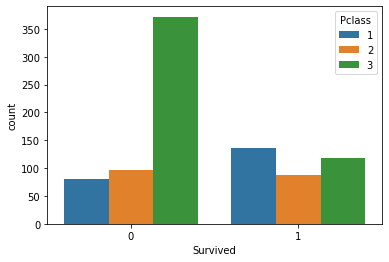

In [19]:
sns.countplot(x="Survived", data = titanic, hue = "Pclass")


<AxesSubplot:xlabel='Sex', ylabel='count'>

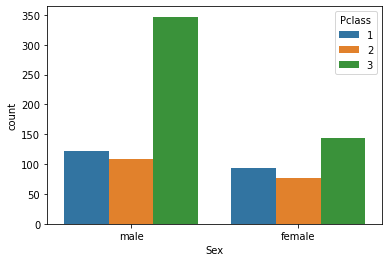

In [76]:
sns.countplot(data=titanic, x='Sex',hue ='Pclass')

In [24]:
x_test.shape,x_train.shape

((223, 10), (668, 10))

<AxesSubplot:xlabel='Age', ylabel='Count'>

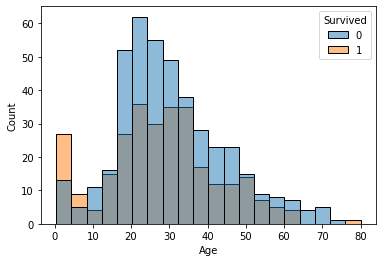

In [29]:
import seaborn as sns
sns.histplot(x="Age",hue='Survived',data=titanic)

In [32]:
mask = titanic['Survived']==1
mask

PassengerId
1      False
2       True
3       True
4       True
5      False
       ...  
887    False
888     True
889    False
890     True
891    False
Name: Survived, Length: 891, dtype: bool

In [40]:
titanic['Age'][mask].mean()


28.343689655172415

In [41]:
mask2 = titanic['Survived']==0
mask2

PassengerId
1       True
2      False
3      False
4      False
5       True
       ...  
887     True
888    False
889     True
890    False
891     True
Name: Survived, Length: 891, dtype: bool

In [42]:
titanic['Age'][mask2].mean()

30.62617924528302

In [48]:
mask3= (titanic['Survived']==1) & (titanic['Sex']=='female')
mask3

PassengerId
1      False
2       True
3       True
4       True
5      False
       ...  
887    False
888     True
889    False
890    False
891    False
Length: 891, dtype: bool

In [47]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [49]:
titanic['Age'][mask3].mean()

28.84771573604061

In [52]:
titanic['Age'].fillna(value=titanic['Age'].mean(),inplace=True)

In [53]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


In [57]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [81]:
df=titanic.groupby(["Pclass","Sex"]).count()
df[['Survived']].unstack(1)

Survived     
Sex      female male
Pclass              
1            94  122
2            76  108
3           144  347